# Dynamic Arrays

Much more common and useful than static arrays. Dynamic arrays are literally static but allocating a new array of double size, each time we hit the limit for the old array

Unlike static arrays, with dynamic arrays we don’t have to specify a size upon initialization. They're usually given a default size and are automatically resized at runtime as the arrays grow

```python
# Insert n in the last position of the array
def pushback(self, n):
    if self.length == self.capacity:
        #find another array of double size - O(n), then move elements one by one to new array - O(n) again
        self.resize()
        
    # insert at next empty position
    self.arr[self.length] = n
    #this self.length is a pointer keeping track of the real size
    self.length += 1
```

## Resizing (allocating new array)

Resize() is achieved by copying over the values to a new static array that is double the size of the original.

```python
def resize(self):
   # Create new array of double capacity
   self.capacity = 2 * self.capacity
   newArr = [0] * self.capacity 

   # Copy elements to newArr
   for i in range(self.length):
       newArr[i] = self.arr[i]
   self.arr = newArr

```

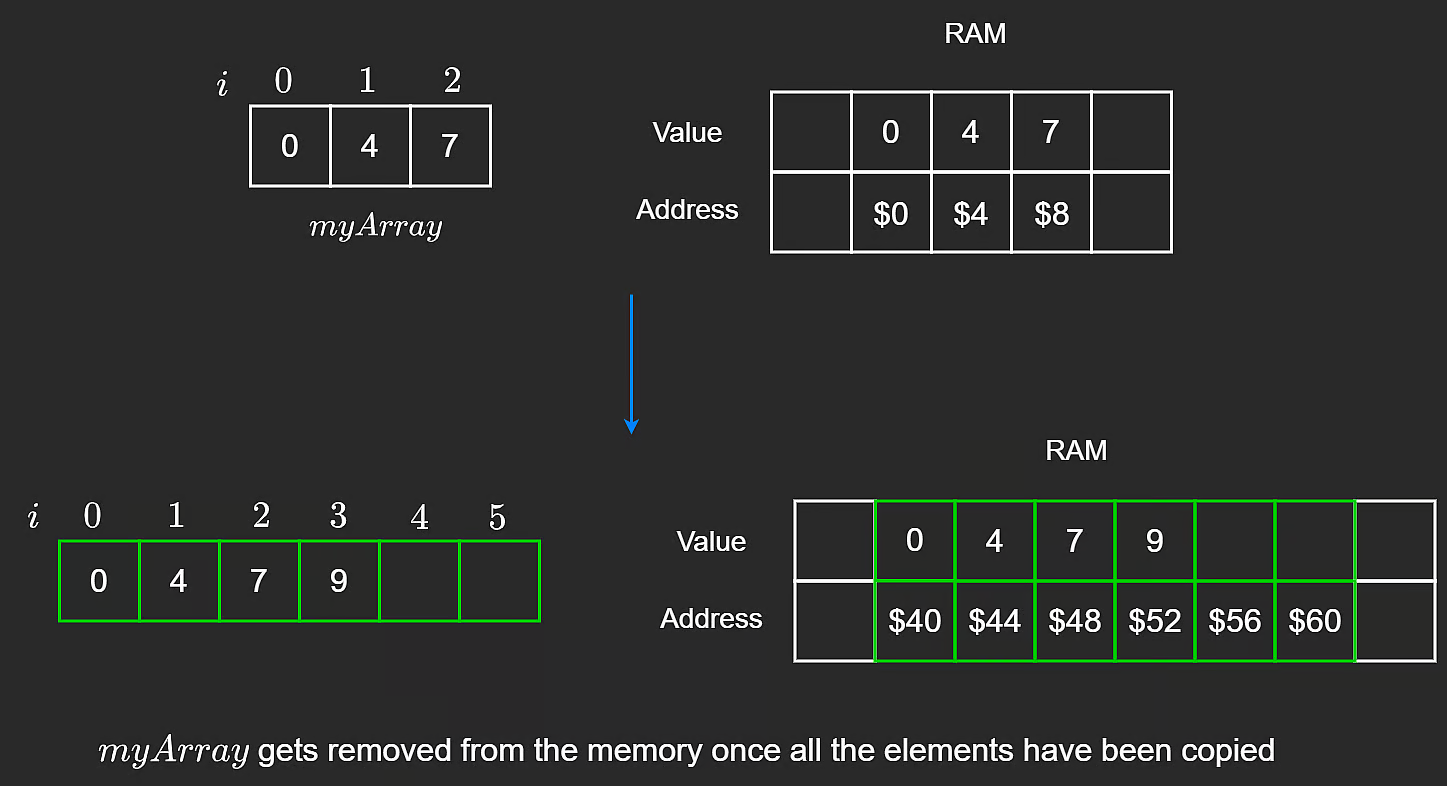

> When all the elements from the first array have been copied over, the first static array will be deallocated.

Adding elements to a dynamic array runs in O(1) *amortized* time

Amortized time complexity is the average time taken per operation over a sequence of operations. The resize operation itself is O(n), but since it is not performed every time we add an element, the average time taken per operation is O(1). But this is only the case if we double the size of the array when we run out of space.


## Why double the capacity?

Basically so that formula for amortized time is O(1).

When adding an array of 8 elements starting from a size 1 array, we will go from `1 -> 2 -> 4 -> 8` To analyze the time complexity we have to take into consideration the sum of all the operations that occured before the last one. We would have to perform `1+2+4+8=15` operatations, including the resize operations.

The dominating term (last term) is always greater than or equal to the sum of all the terms before it, in this case `1+2+4=7<8`, so we get a total of 15 operations for an array of size 8.

Generally for an array of size $n$, it will take at most $2n$ operations to create, hence complexity $O(n)$. Since inserting $n$ elements into dynamic array is $O(n)$, then the amortized time complexity of inserting a single element is $O(1)$

## Other Operations
Inserting or removing from the middle of a dynamic array would be similar to a static array. We would have to shift elements to the right or left to make space for the new element or to fill the gap left by the removed element. This would run in O(n) time. 

Note that adding to end of array is known as **pushing** to an array

---
## Closing Notes

| Operation | Big-O Time | Notes |
|:-|:-|-:|
| Access | O(1) | |
| Insertion | O(1)* amortized | O(n) if in middle (shifting required) |
| Deletion | O(1)* amortized | O(n) if in middle (shifting required) |

In [1]:
# Python arrays are dynamic by default, but this is an example of resizing.
class Array:
    def __init__(self):
        self.capacity = 2
        self.length = 0
        self.arr = [0] * 2 # Array of capacity = 2

    # Insert n in the last position of the array
    def pushback(self, n):
        if self.length == self.capacity:
            self.resize()
            
        # insert at next empty position
        self.arr[self.length] = n
        self.length += 1

    def resize(self):
        # Create new array of double capacity
        self.capacity = 2 * self.capacity
        newArr = [0] * self.capacity 
        
        # Copy elements to newArr
        for i in range(self.length):
            newArr[i] = self.arr[i]
        self.arr = newArr
        
    # Remove the last element in the array
    def popback(self):
        if self.length > 0:
            self.length -= 1
    
    # Get value at i-th index
    def get(self, i):
        if i < self.length:
            return self.arr[i]
        # Here we would throw an out of bounds exception

    # Insert n at i-th index
    def insert(self, i, n):
        if i < self.length:
            self.arr[i] = n
            return
        # Here we would throw an out of bounds exception       

    def print(self):
        for i in range(self.length):
            print(self.arr[i])
        print()